## Explore here

## 1. Exploración y limpieza superficial de los datos

In [140]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [141]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [142]:
total_data = total_data[total_data["price"] != 0]
  

In [143]:
total_data.shape

(48884, 16)

In [144]:
total_data.drop(["id", "name",  "host_id",  "host_name", "last_review"], axis = 1, inplace = True)
total_data.head()

/tmp/ipykernel_558/3204522361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data.drop(["id", "name",  "host_id",  "host_name", "last_review"], axis = 1, inplace = True)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [145]:
# Lista de columnas a excluir
excluded_columns = ['number_of_reviews', 'reviews_per_month', 'availability_365']

# Calcula la proporción de ceros por fila
row_zero_percentage = (total_data.drop(columns=excluded_columns) == 0).mean(axis=1)

# Identifica las filas con menos del 70% de ceros
threshold = 0.7
rows_to_replace = total_data[row_zero_percentage < threshold]

# Itera sobre las filas para sustituir los valores
for index, row in rows_to_replace.iterrows():
    # Itera sobre las columnas para sustituir los valores
    for column in total_data.columns:
        if column not in excluded_columns and row[column] == 0:
            # Sustituye el valor por la mediana de la columna
            median_value = total_data[column].median()
            total_data.at[index, column] = median_value

## 2. Análisis uni-variante

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

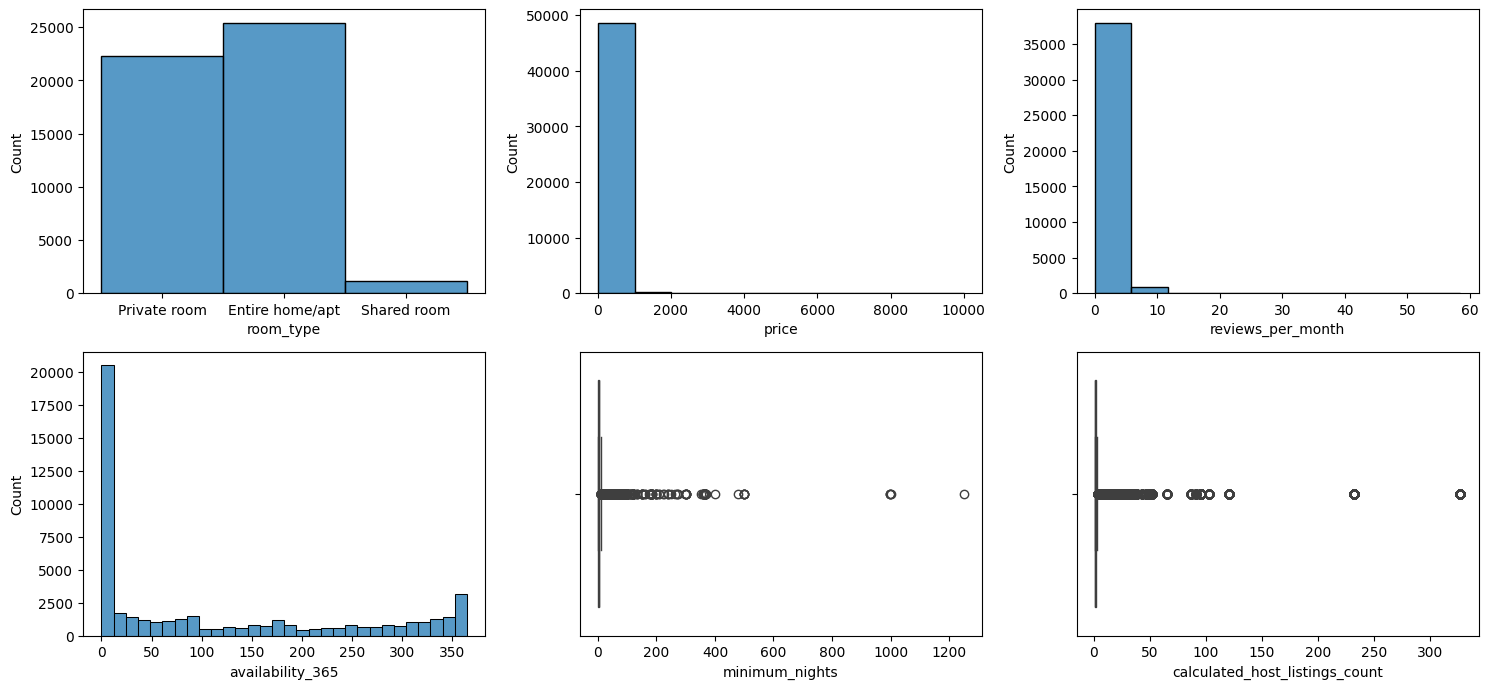

In [147]:
fig, axis = plt.subplots(2,3, figsize = (15,7))


sns.histplot(data = total_data, x ="room_type", ax = axis[0,0])
sns.histplot(data = total_data, x ="price", ax = axis[0,1], bins = 10)
sns.histplot(data = total_data, x ="reviews_per_month", ax = axis[0,2], bins = 10)
sns.histplot(data = total_data, x ="availability_365", ax = axis[1,0])
sns.boxplot(data = total_data, x ="minimum_nights", ax = axis[1,1])
sns.boxplot(data = total_data, x ="calculated_host_listings_count", ax = axis[1,2])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_558/3379928449.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=320)


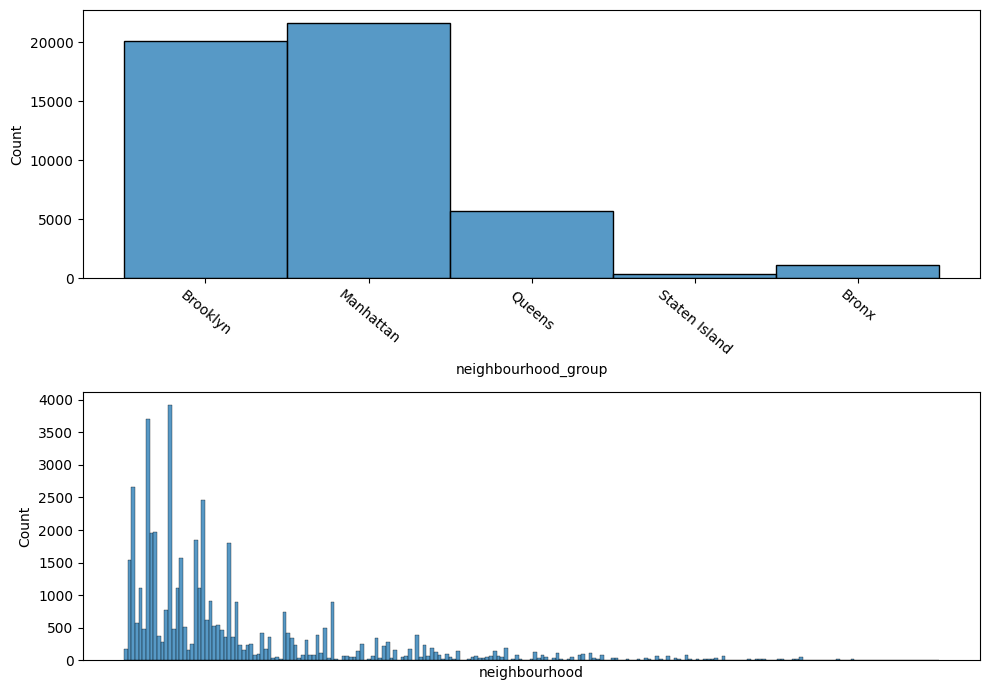

In [148]:
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(data = total_data, x ="neighbourhood_group", ax = axis[0])
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=320)
sns.histplot(data = total_data, x ="neighbourhood", ax = axis[1])
axis[1].set_xticks([])



plt.tight_layout()
plt.show()


In [149]:
total_data = total_data.sort_values(by='price', ascending=False)


We see it convinivent to numeralize every category in order to compare everything.

In [150]:
codes_rt, uniques_rt = pd.factorize(total_data["room_type"], use_na_sentinel=False)
print(uniques_rt)
total_data["room_type_num"] = codes_rt



codes_ng, uniques_ng = pd.factorize(total_data["neighbourhood_group"], use_na_sentinel=False)
print(uniques_ng)
total_data["neighbourhood_group_num"] = codes_ng

codes_n, uniques_n = pd.factorize(total_data["neighbourhood"], use_na_sentinel=False)
print(uniques_n)
total_data["neighbourhood"] = codes_n

total_data.head()

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object')
Index(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'], dtype='object')
Index(['Upper West Side', 'Greenpoint', 'Astoria', 'Lower East Side',
       'East Harlem', 'Tribeca', 'Clinton Hill', 'Upper East Side',
       'Battery Park City', 'East Flatbush',
       ...
       'Emerson Hill', 'Woodlawn', 'Arden Heights', 'Co-op City',
       'Silver Lake', 'Grant City', 'Bull's Head', 'Richmondtown', 'Rossville',
       'New Dorp'],
      dtype='object', length=221)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
29238,Manhattan,0,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,1,83,0,0
17692,Brooklyn,1,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,0,1
9151,Queens,2,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1,2
12342,Manhattan,3,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,1,0
40433,Manhattan,3,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,1,365,0,0


## 3. Análisis multi-variante

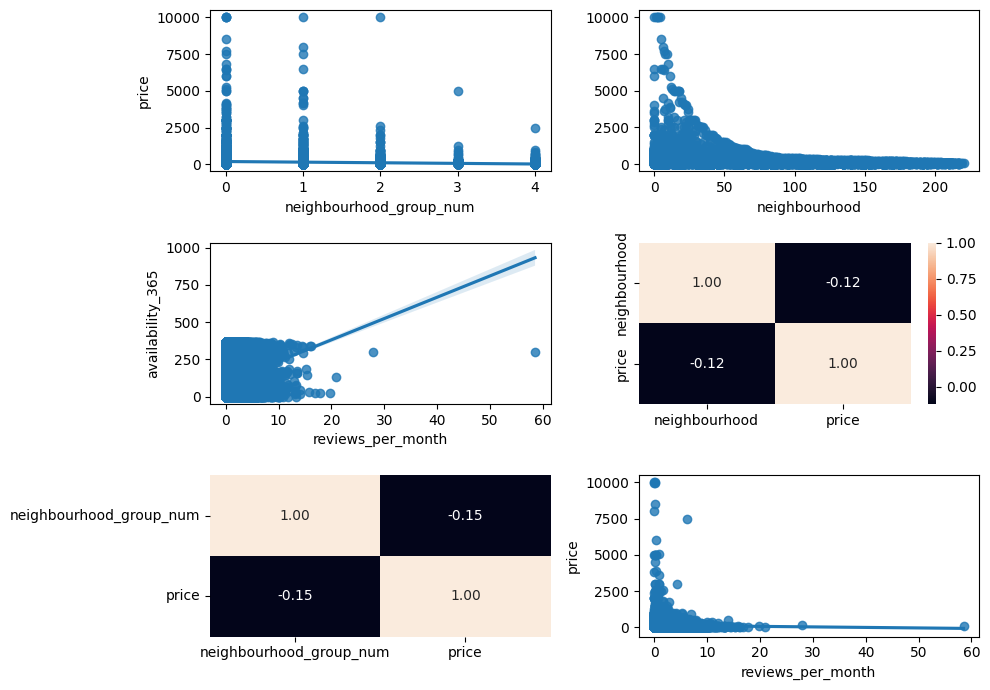

In [151]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group_num", y = "price")
sns.heatmap(total_data[["neighbourhood_group_num", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 0], cbar = False)
sns.regplot(ax = axis[1, 0], data = total_data, x = "reviews_per_month", y = "availability_365")
sns.regplot(ax = axis[0, 1], data = total_data, x = "neighbourhood", y = "price").set(ylabel=None)
sns.heatmap(total_data[["neighbourhood", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(data = total_data, x = "reviews_per_month", y = "price", ax = axis [2,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

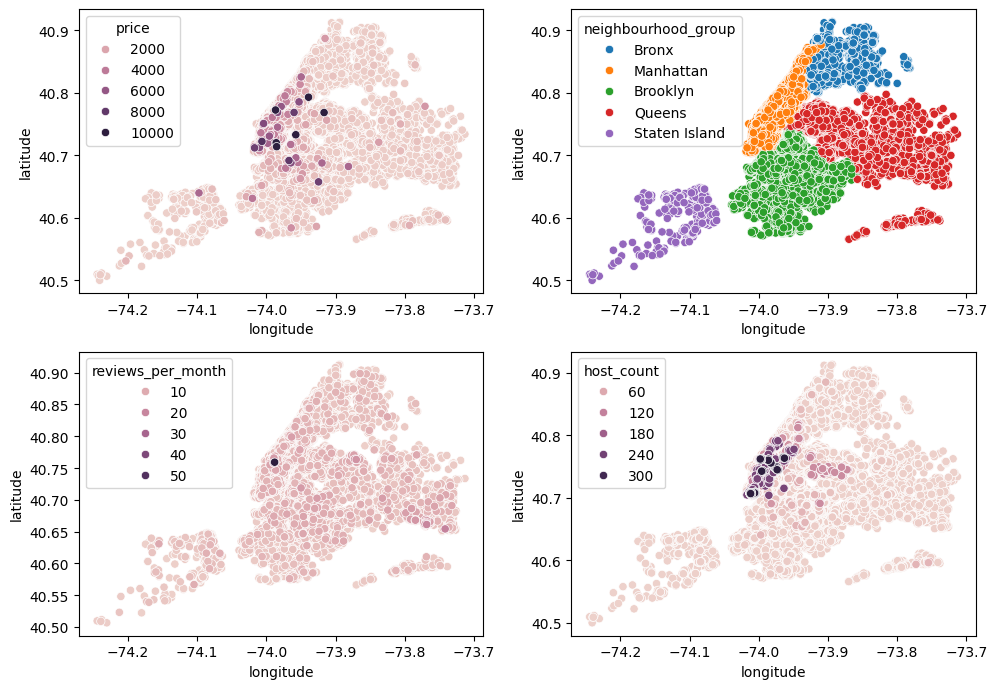

In [152]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

data_sorted = total_data.sort_values(by="price") 
data_sorted2 = total_data.sort_values(by="reviews_per_month") 
data_sorted3 = total_data.sort_values(by="calculated_host_listings_count") 

sns.scatterplot(ax = axis[0, 0], data = data_sorted, x = "longitude", y = "latitude", hue = "price")
sns.scatterplot(ax = axis[0, 1], data = data_sorted, x = "longitude", y = "latitude", hue = "neighbourhood_group")
sns.scatterplot(ax = axis[1, 0], data = data_sorted2, x = "longitude", y = "latitude", hue = "reviews_per_month")
sns.scatterplot(ax = axis[1, 1], data = data_sorted3, x = "longitude", y = "latitude", hue = "calculated_host_listings_count")
axis[1,1].legend(loc='upper left', title = "host_count")
# sns.regplot(ax = axis[0, 1], data = total_data, x = "neighbourhood", y = "price").set(ylabel=None)
# sns.heatmap(total_data[["neighbourhood", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

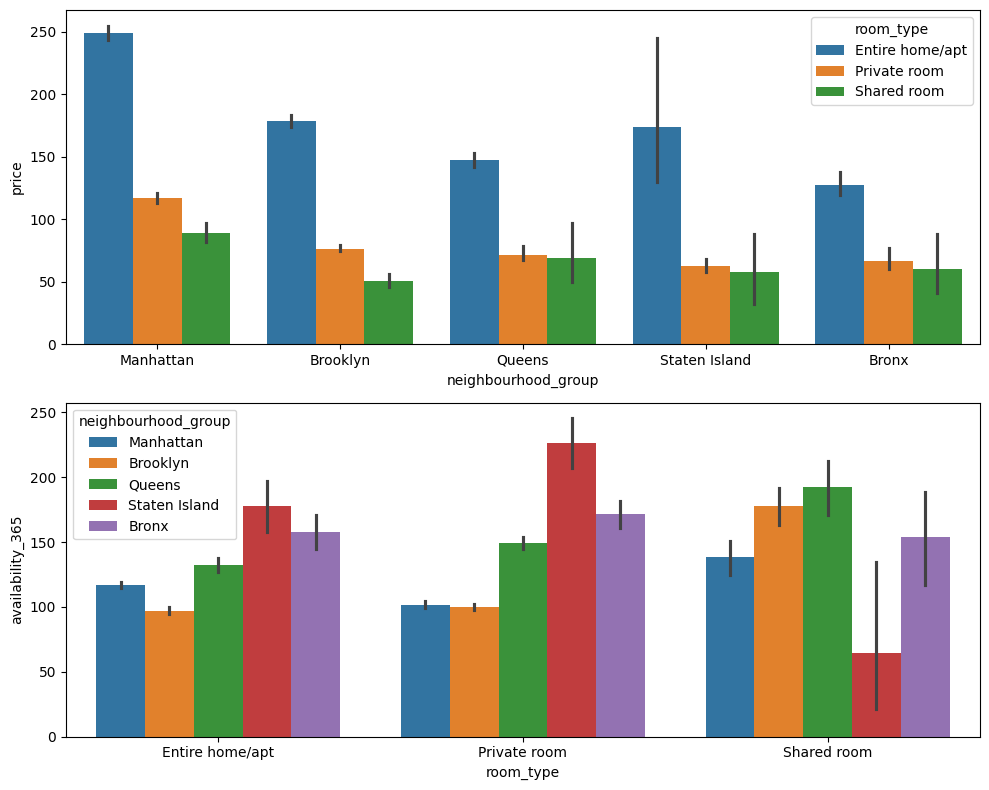

In [153]:
fig, axis = plt.subplots(2, figsize = (10,8))
sns.barplot(data = total_data, x ="neighbourhood_group", y ="price", hue = "room_type", ax = axis[0])
sns.barplot(data = total_data, x ="room_type", y ="availability_365", hue = "neighbourhood_group", ax = axis[1])


plt.tight_layout()
plt.show()

In [154]:
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
29238,Manhattan,0,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,1,83,0,0
17692,Brooklyn,1,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,0,1
9151,Queens,2,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,1,2
12342,Manhattan,3,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,1,0
40433,Manhattan,3,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,1,365,0,0


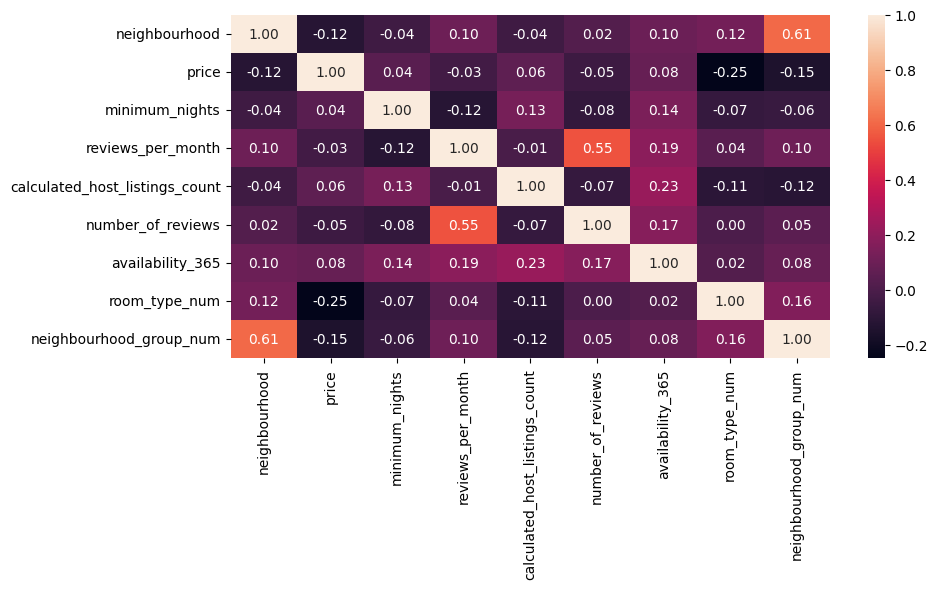

In [155]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood", "price", "minimum_nights", "reviews_per_month", "calculated_host_listings_count","number_of_reviews", "availability_365", "room_type_num", "neighbourhood_group_num"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# II. Feature engineering 

## 1. Análisis de outliers

In [156]:
total_data.drop(["latitude", "longitude"], axis= 1, inplace = True)
total_data.describe()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
count,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,35.319061,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498,0.503948,0.754971
std,37.059397,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271,0.545315,0.854502
min,0.000000,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,21.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,0.000000,1.000000
75%,41.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,220.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


## 2. Análisis de valores faltantes

In [160]:
from sklearn.preprocessing import StandardScaler

num_variables = ["neighbourhood", "price","minimum_nights",	"number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365",	"room_type_num", "neighbourhood_group_num"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm["price"] = total_data["price"]
total_data_norm.head()



,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num
29238,-0.953049,10000,1.119837,-0.522369,NaN,-0.18645,-0.226243,-0.924152,-0.883531
17692,-0.926065,10000,-0.098961,-0.410138,-0.721941,-0.18645,-0.856818,-0.924152,0.286754
9151,-0.899081,10000,4.532471,-0.477476,-0.793354,-0.18645,-0.856818,0.909671,1.457039
12342,-0.872097,9999,4.483719,-0.387691,-0.733843,-0.18645,-0.226243,0.909671,-0.883531
40433,-0.872097,9999,1.119837,-0.522369,NaN,-0.18645,1.916192,-0.924152,-0.883531
